<a href="https://colab.research.google.com/github/hrishabhsaini18/basic_deep_learning/blob/main/ANN_for_IRIS_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Defining the basic model structure of the NN
class Model(nn.Module):

  def __init__(self, in_nodes=4, hidden_1=10, hidden_2=8, hidden_3=6, out_nodes=3):
    super().__init__()
    self.fullyconnected1 = nn.Linear(in_nodes, hidden_1)
    self.fullyconnected2 = nn.Linear(hidden_1, hidden_2)
    self.fullyconnected3 = nn.Linear(hidden_2, hidden_3)
    self.output_layer = nn.Linear(hidden_3, out_nodes)

  def forward(self,x):
    x = F.relu(self.fullyconnected1(x))
    x = F.relu(self.fullyconnected2(x))
    x = F.relu(self.fullyconnected3(x))
    x = self.output_layer(x)

    return(x)

In [ ]:
# Initiate weights and biases for the model i.e. initial model parameters
torch.manual_seed(18)
my_model = Model()

In [ ]:
# Import the dataset
path =  'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
user_data = pd.read_csv(path)

In [ ]:
user_data.head()

# changing the label as integers
user_data['variety'] = user_data['variety'].replace('Setosa', 0)
user_data['variety'] = user_data['variety'].replace('Versicolor', 2)
user_data['variety'] = user_data['variety'].replace('Virginica', 2)

user_data.tail(-19)

,sepal.length,sepal.width,petal.length,petal.width,variety
19,5.1,3.8,1.5,0.3,0
20,5.4,3.4,1.7,0.2,0
21,5.1,3.7,1.5,0.4,0
22,4.6,3.6,1.0,0.2,0
23,5.1,3.3,1.7,0.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Making the data ready for training
X = user_data.drop('variety', axis=1)
y = user_data['variety']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
# Change these array(by X_train.values etc..) back to tensors (reason will be evident in future models)
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [ ]:
# Defining the LOSS FUNCTION and LEARNING RATE
obj_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_model.parameters(), lr=0.01)

In [ ]:
# Training of the Model(i.e. my_model)
epochs = 100 # set epochs for the training
losses = []  # define array to append losses

for i in range(epochs):
  y_pred = my_model.forward(X_train) # output
  loss = obj_fn(y_pred, y_train) # calculating the loss
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch number:{i} & loss is :{loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number:0 & loss is :0.9974157214164734
Epoch number:10 & loss is :0.5230641961097717
Epoch number:20 & loss is :0.27643582224845886
Epoch number:30 & loss is :0.06777317821979523
Epoch number:40 & loss is :0.010910979472100735
Epoch number:50 & loss is :0.002574431011453271
Epoch number:60 & loss is :0.0011429345468059182
Epoch number:70 & loss is :0.0007590684108436108
Epoch number:80 & loss is :0.0006022916059009731
Epoch number:90 & loss is :0.0005164445610716939


Text(0.5, 0, 'Epoch#')

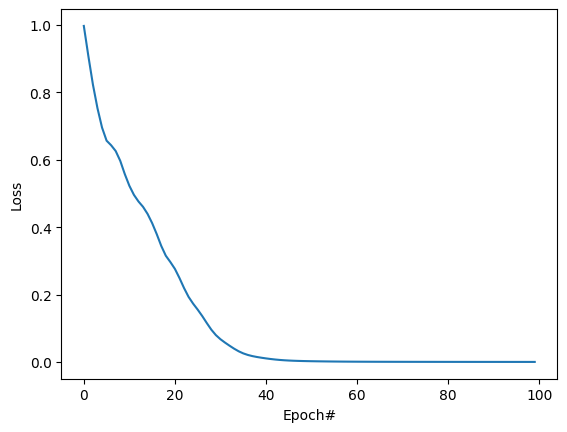

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch#')

In [ ]:
# Evaluate the model on test dataset
with torch.no_grad():
  y_eval = my_model.forward(X_test)
  loss = obj_fn(y_eval, y_test)
loss

tensor(0.0002)

In [ ]:
# check how much it performed on the test dataset
true_positives = 0

with torch.no_grad():
  for i,data in enumerate(X_test):
    y_class = my_model.forward(data)

    if y_test[i]==0:
      label = '0'
    elif y_test[i]==1:
      label = '1'
    else:
      label = '2'

    # check which class is which
    print(f'{i+1} --> {str(y_class)}, True:{label}; Predicted:{y_class.argmax().item()}')

    # Count the validation sets
    if y_class.argmax().item() == y_test[i]:
      true_positives+=1


print(f'Total validation accuracy: {true_positives} / {len(y_test)}')


1 --> tensor([ -1.8468, -11.1420,  10.0547]), True:2; Predicted:2
2 --> tensor([ -3.2543, -12.4406,  12.4792]), True:2; Predicted:2
3 --> tensor([ 6.3125, -6.5860, -1.7226]), True:0; Predicted:0
4 --> tensor([ -1.5904, -11.0613,   9.7330]), True:2; Predicted:2
5 --> tensor([ 5.8827, -6.1843, -1.5998]), True:0; Predicted:0
6 --> tensor([-0.7790, -8.9733,  7.3013]), True:2; Predicted:2
7 --> tensor([ -2.5577, -11.7468,  11.2400]), True:2; Predicted:2
8 --> tensor([ -0.5039, -10.1524,   7.9314]), True:2; Predicted:2
9 --> tensor([ 5.9914, -6.3289, -1.6015]), True:0; Predicted:0
10 --> tensor([ -1.6725, -10.6054,   9.4649]), True:2; Predicted:2
11 --> tensor([ -1.7862, -10.5689,   9.5516]), True:2; Predicted:2
12 --> tensor([ -3.1078, -11.7103,  11.7681]), True:2; Predicted:2
13 --> tensor([ -1.5661, -10.0130,   8.9003]), True:2; Predicted:2
14 --> tensor([ 5.6984, -6.0941, -1.4889]), True:0; Predicted:0
15 --> tensor([ 6.0911, -6.3489, -1.6799]), True:0; Predicted:0
16 --> tensor([ -3.420

In [ ]:
# MODEL IS TRAINED!!
""" How can now this model be Saved and Loaded for future references ? """

torch.save(my_model.state_dict(), 'Trained_model_1.pt')  # saved the parameters in this .pt file

In [ ]:
my_new_model = Model()  # to make a new model of same architecture as Model
my_new_model.load_state_dict(torch.load('Trained_model_1.pt'))
my_new_model.eval()

Model(
  (fullyconnected1): Linear(in_features=4, out_features=10, bias=True)
  (fullyconnected2): Linear(in_features=10, out_features=8, bias=True)
  (fullyconnected3): Linear(in_features=8, out_features=6, bias=True)
  (output_layer): Linear(in_features=6, out_features=3, bias=True)
)

In [ ]:
new_data = torch.tensor([5.9,	3.9,	1.5,	0.4])
with torch.no_grad():
  result = my_new_model(new_data)
  print(f'Its flower-{result.argmax().item()}')

Its flower-0
